# Aprendizaje no supervisado

- Es un aspecto del Machine Learning que consiste en extraer información oculta en datos sin etiquetar.
- Dado que las instancias que usamos en el algoritmo deaprendizaje son instancias sin etiquetar, no existe una señal de error que podamos usar para guiar el ajuste

Algunas aproximaciones:
- Clustering
- Blind Signal Separation for Dimensional Reduction (PCAs)

<a href="https://chatbotsmagazine.com/lets-know-supervised-and-unsupervised-in-an-easy-way-9168363e06ab"><img src="../images/supervised_vs_unsupervised.png"></a>

## Clustering

- Clustering es la tarea de agrupar un conjunto de instancias en subgrupos (llamados clusters) de tal forma que las instancias pertenecientes al mismo cluster están más próximas entre sí de acuerdo a alguna característica
- Usan una medida de distancia para determinar cómo de cerca están dos instancias entre sí

Hay distintos tipos de clustering
- Jerárquico
- Basado en centroides
- Basado en distribución
- Basado en densidad

### KMeans
- Es un algoritmo que permite dividir los objetos en k conjuntos, siendo k<n (número de instancias)
- Asume que los atributos forman un espacio de vectores e intenta conseguir una teselación de Voronoi

1. Elegir el número de clusters (k)
2. Inicializar k clusters con k centroides escogidos aleatoriamente de entre todos los puntos
3. Asignamos cada uno de los puntos restantes al centroide más cercano
4. Tomamos sucesivamente cada punto y calculamos su distancia al resto de centroides. 
    - Si encontramos un centroide distinto con distancia menor, movemos el punto a ese cluster y actualizamos los centroides de ambos clusters
5. Repetimos el paso 4 hasta que realicemos una pasada por todos los puntos sin hacer reasignaciones de puntos

<img src="../images/kmeans_example.png">

Algunos casos de uso son:

- Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
- Categorización de Inventario: agrupar productos por actividad en sus ventas
- Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

In [1]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])

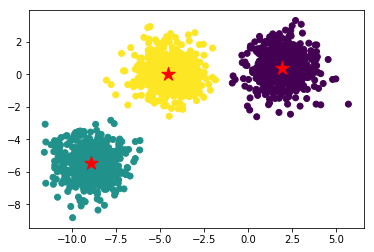

In [2]:
# Incorrect number of clusters
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)

C = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=200)

plt.show()

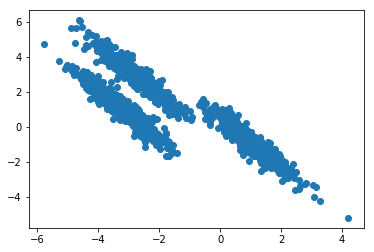

In [3]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.show()

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

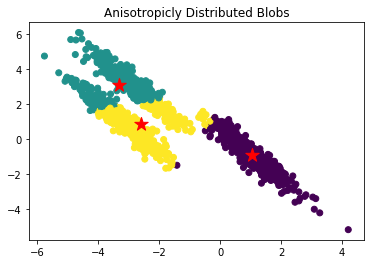

In [4]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso)
C = kmeans.cluster_centers_

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=200)

plt.title("Anisotropicly Distributed Blobs")

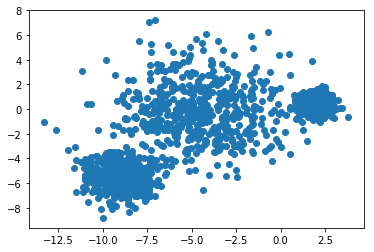

In [10]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1])

plt.show()

Text(0.5, 1.0, 'Unequal Variance')

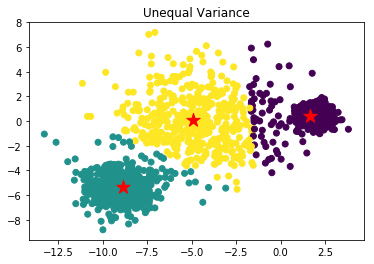

In [9]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_varied)
C = kmeans.cluster_centers_

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=200)
plt.title("Unequal Variance")

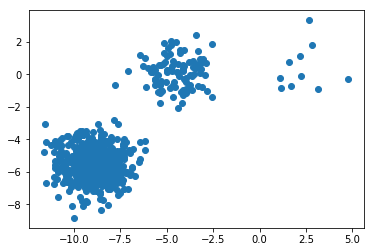

In [11]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

plt.scatter(X_filtered[:, 0], X_filtered[:, 1])
plt.show()

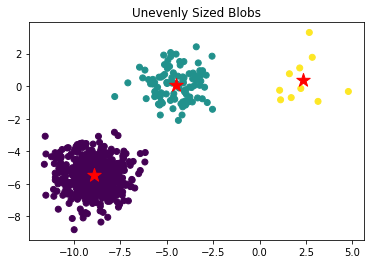

In [14]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_filtered)

C = kmeans.cluster_centers_

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=200)
plt.title("Unevenly Sized Blobs")
plt.show()

### Buscar el valor de K

In [16]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-43533.29436635671,
 -13264.032353355504,
 -2862.7319140789523,
 -2524.405754267251,
 -2211.984978845969,
 -1926.7333262354011,
 -1695.534492762884,
 -1491.9266176997598,
 -1284.780539055189,
 -1185.7658643998952,
 -1102.2112527619483,
 -1014.1531447423447,
 -954.1667987498458,
 -887.9795234767172,
 -840.3121616084841,
 -790.9479332879614,
 -742.0581634975275,
 -696.2507490912553,
 -671.1629521982043]

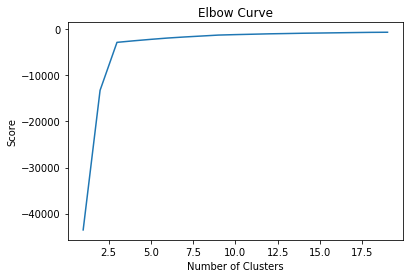

In [17]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()